In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import skew, kurtosis, zscore
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


#### Traded Company Data

Utilizing Yahoo Finance, I opted to use Apple stock, as it is something I am interested in, for this dataset analysis. I accounted for holidays to assure I had the required 30 values over six weeks. I read in the Excel file to Python to complete the calculations. The column headers had white space that needed to be cleaned prior to use. The required column, Adj Close, defaulted to a float data type which allowed for calculations. Using the .diff() function, a difference column was created for reference. Using the .pct_change() function allowed for the percentage change to be documented for all weeks except the first (no previous value to compare). It was found that field needed to be multiplied by 100 in order to obtain the correct percentage value. 

Code samples and definitions were located using ChatGPT. Cells will be noted where this was utilized.

In [2]:
# Homework 2, Question 2 (a) Read in data from apple_stock_history.xlsx
df = pd.read_excel('/Users/helenamabey/Downloads/apple_stock_history.xlsx')
# Used .head() to limit returns for ease of viewing
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-02-07,232.51,234.00,227.27,227.63,227.63,38983016
1,2025-02-06,231.29,233.80,230.43,233.22,233.22,29925300
2,2025-02-05,228.53,232.67,228.27,232.47,232.47,39620300
3,2025-02-04,227.25,233.13,226.65,232.80,232.80,45067300
4,2025-02-03,229.99,231.83,225.70,228.01,228.01,73063300


In [3]:
# Removed white space from column names
df.columns = df.columns.str.strip()

In [5]:
# Use .diff() to calculate the difference between the row prior. Index 0 will have a null value leaving 29 values.
# Found sample code in ChatGPT to determine correct function to use.
df['Difference'] = df['Adj Close'].diff()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Difference
0,2025-02-07,232.51,234.00,227.27,227.63,227.63,38983016,NaN
1,2025-02-06,231.29,233.80,230.43,233.22,233.22,29925300,5.59
2,2025-02-05,228.53,232.67,228.27,232.47,232.47,39620300,-0.75
3,2025-02-04,227.25,233.13,226.65,232.80,232.80,45067300,0.33
4,2025-02-03,229.99,231.83,225.70,228.01,228.01,73063300,-4.79
5,2025-01-31,247.19,247.19,233.44,236.00,236.00,101075100,7.99
6,2025-01-30,238.67,240.79,237.21,237.59,237.59,55658300,1.59
7,2025-01-29,234.12,239.86,234.01,239.36,239.36,45486100,1.77
8,2025-01-28,230.85,240.19,230.81,238.26,238.26,75707600,-1.10
9,2025-01-27,224.02,232.15,223.98,229.86,229.86,94863400,-8.40


In [6]:
#  Homework 2, Question 2 (b)
# Use .pct_change()to calculate the percentage difference between the row prior. Index 0 will have a null value leaving 29 values.
# Found sample code in ChatGPT to determine correct function to use and how to correct the decimal placing for a percentage.
df['Percentage Change'] = df['Adj Close'].pct_change() * 100
df

,Date,Open,High,Low,Close,Adj Close,Volume,Difference,Percentage Change
0,2025-02-07,232.51,234.00,227.27,227.63,227.63,38983016,NaN,NaN
1,2025-02-06,231.29,233.80,230.43,233.22,233.22,29925300,5.59,2.455740
2,2025-02-05,228.53,232.67,228.27,232.47,232.47,39620300,-0.75,-0.321585
3,2025-02-04,227.25,233.13,226.65,232.80,232.80,45067300,0.33,0.141954
4,2025-02-03,229.99,231.83,225.70,228.01,228.01,73063300,-4.79,-2.057560
5,2025-01-31,247.19,247.19,233.44,236.00,236.00,101075100,7.99,3.504232
6,2025-01-30,238.67,240.79,237.21,237.59,237.59,55658300,1.59,0.673729
7,2025-01-29,234.12,239.86,234.01,239.36,239.36,45486100,1.77,0.744981
8,2025-01-28,230.85,240.19,230.81,238.26,238.26,75707600,-1.10,-0.459559
9,2025-01-27,224.02,232.15,223.98,229.86,229.86,94863400,-8.40,-3.525560


In [14]:
# Verified that all rows except Difference and Percentage Change have 30 values. Difference and Percentage Change have 29 values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               30 non-null     datetime64[ns]
 1   Open               30 non-null     float64       
 2   High               30 non-null     float64       
 3   Low                30 non-null     float64       
 4   Close              30 non-null     float64       
 5   Adj Close          30 non-null     float64       
 6   Volume             30 non-null     int64         
 7   Difference         29 non-null     float64       
 8   Percentage Change  29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 2.2 KB


In [17]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference,Percentage Change
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,29.000000,29.000000
mean,2025-01-16 23:12:00,237.593667,240.022667,234.708333,237.376667,237.376667,5.316054e+07,1.054138,0.451616
min,2024-12-24 00:00:00,219.790000,224.120000,219.380000,222.640000,222.640000,2.323470e+07,-8.400000,-3.525560
25%,2025-01-06 06:00:00,230.205000,232.785000,227.460000,229.890000,229.890000,3.951560e+07,-1.100000,-0.459559
50%,2025-01-16 12:00:00,234.695000,239.410000,232.735000,236.425000,236.425000,4.527670e+07,0.880000,0.395009
75%,2025-01-28 18:00:00,244.072500,246.780000,241.702500,243.195000,243.195000,6.352260e+07,3.390000,1.341993
max,2025-02-07 00:00:00,258.190000,260.100000,257.630000,259.020000,259.020000,1.010751e+08,9.610000,4.210111
std,NaN,10.813714,10.130513,10.685454,10.314393,10.314393,2.036697e+07,4.264495,1.831889


#### Distribution Analysis
#####  Homework 2, Question 2 1.), 2.), and 3.):

When analyzing the distribution of percentage change and adjusted close price of Apple stock over the six-week period from 12/24/2024 to 02/07/2025, the skewness and kurtosis values for both metrics were reviewed first then validated with histograms and box plots.

The percentage change has a very slight left-skewed distribution with a skewness value of -0.0515. A symmetrical skewness would be at 0 so this value is nearly balanced. The kurtosis value of 0.1686 suggests a distribution that is somewhat peaked with moderate tails on both the left and right sides, indicating some outliers. When comparing this value to the normal kurtosis value of 3, this amount is just a bit higher so the distribution is also nearly normal. When reviewing the adjusted close price, the skewness value of 0.5653 shows a slight right-skewed distribution, with more lower values and a few higher outliers. The kurtosis value of -0.3554 shows a flatter distribution, with the values more evenly spread across the range rather than in a normal distribution with a bell-curve shape.

To confirm the initial findings, histograms and box plots were created for both metrics. The histogram and box plot for percentage change indicate a nearly normal distribution, with data balanced on both sides and few outliers. The use of 10 bins captures this distribution well. The box plot is nearly centered, and the mean and median are very similar, which both support the almost normal distribution of the values. For the adjusted close price, the histogram reveals a larger number of values toward the lower end, with a few outliers on the right. The bin count was increased to 12 which made it easier to define where the largest concentration of values were located. The box plot shows a similar result with the interquartile range pulled toward lower values. Even with the relatively wide range between the minimum and maximum values (222.64 and 259.02 consecutively), the mean and median are very similar.

Both the percentage change and adjusted close price seem approximately evenly distributed with the percentage change being closer to a normal distribution.

Based on the results of this analysis, Apple stock adjusted close price tends to have little flucuation day over day, at least based on this small sample size. A few days saw gains and losses above +/- 3% but generally, the stock prices appears stable. In order to validate this further, a larger sample size may give insight to the stock's long-term performance and stability. 

In [15]:
# Gather skewness and kurtosis for Percentage Change
print("Skewness:", df["Percentage Change"].skew())
print("Kurtosis:", df["Percentage Change"].kurt())

Skewness: -0.051498495794347926
Kurtosis: 0.16860820499134999


In [16]:
# Gather skewness and kurtosis for Adjusted Close
print("Skewness:", df["Adj Close"].skew())
print("Kurtosis:", df["Adj Close"].kurt())

Skewness: 0.5653429215722883
Kurtosis: -0.3553698723722314


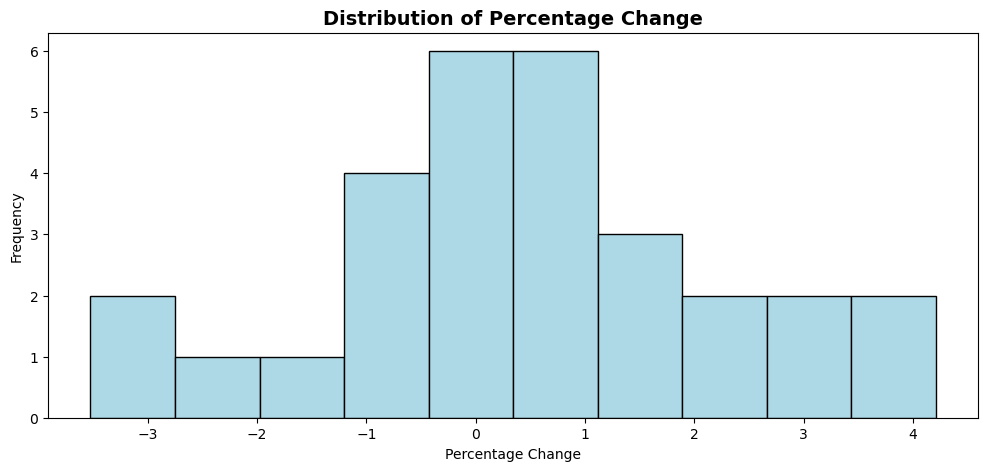

In [23]:
#Percentage Change Histogram
plt.figure(figsize=(12, 5))
df['Percentage Change'].plot(kind='hist', bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Percentage Change', fontsize=14, fontweight='bold')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()

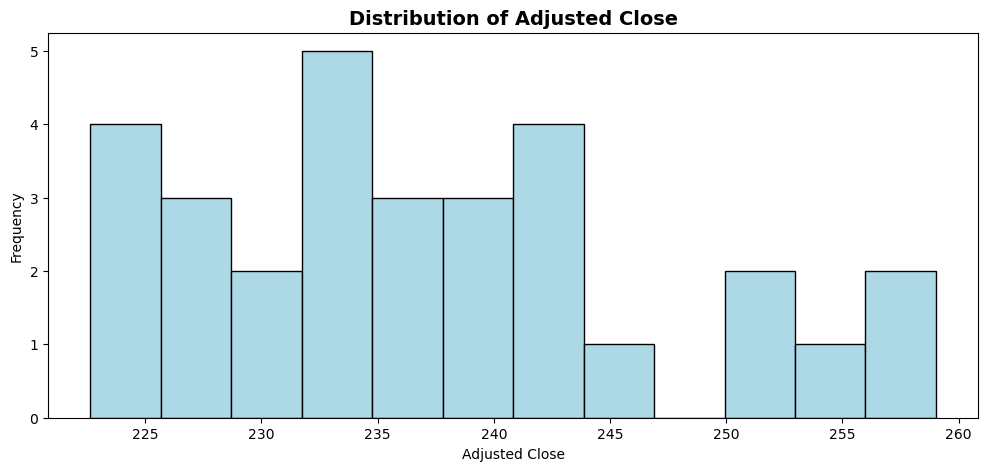

In [20]:
#Adjusted Close Histogram
plt.figure(figsize=(12, 5))
df['Adj Close'].plot(kind='hist', bins=12, color='lightblue', edgecolor='black')
plt.title('Distribution of Adjusted Close', fontsize=14, fontweight='bold')
plt.xlabel('Adjusted Close')
plt.ylabel('Frequency')
plt.show()

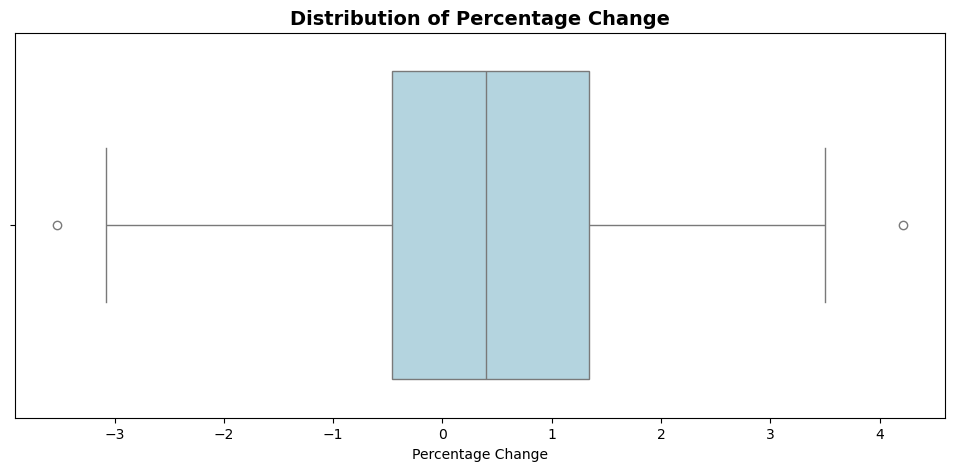

In [18]:
#Percentage Change Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Percentage Change"], color="lightblue")
plt.title("Distribution of Percentage Change", fontsize=14, fontweight='bold')
plt.show()

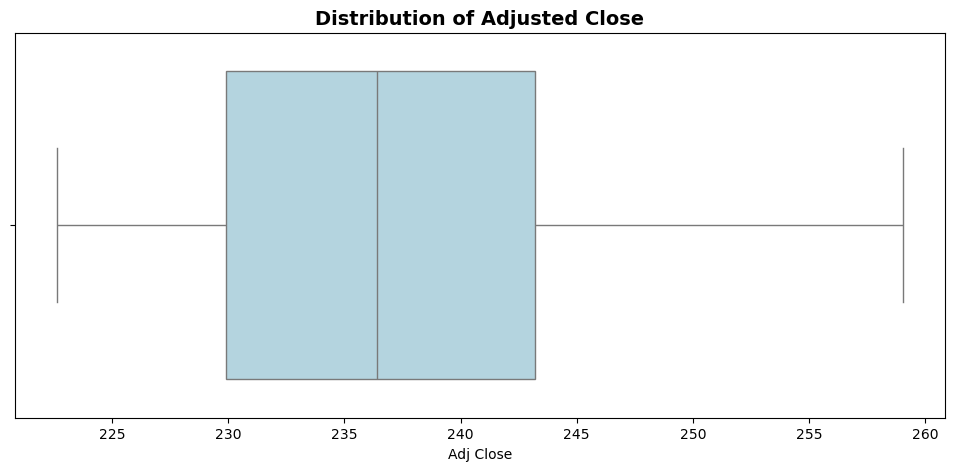

In [19]:
#Adjusted Close Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Adj Close"], color="lightblue")
plt.title("Distribution of Adjusted Close", fontsize=14, fontweight='bold')
plt.show()

#### AI Statement
 
During this exercise, I utilized multiple sources online to assist in learning and understanding definitions and appropriate Python coding. In my notebook, I cited references to ChatGPT as they were used and the purpose for which they were used. I am developing my Python skills, so I relied on the sample code provided by ChatGPT to give guidance on how to apply it to this dataset. For the visualizations, I utilized my prior assignment code and adjusted it for this dataset. Sample code for that assignment was located through ChatGPT for formatting and other visualization features. 